In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


In [10]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

In [11]:
# Booth Function

def fitness(state):
    x = state[0]
    y = state[1]
    h_x = max((0,(x**2 + y**2 - 2)**2))**2
    return -((1-x)**2 + 100*((y-x**2)**2) + h_x)
    #a = -20*math.exp(-0.2*math.sqrt(0.5*(x**2 + y**2)))
    #b = -math.exp(0.5*(math.cos(2*math.pi*x) + math.cos(2*math.pi*y) )) + math.exp(1) + 20
    #return -a-b

In [12]:
n = 2
num_particles = 1000
num_iterations = 1000
inertia_factor = 0.5
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [13]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [14]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [15]:
global_best.state

array([1., 1.])

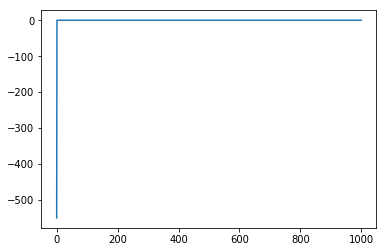

In [16]:
plot(list(range(len(convergence_curve))), convergence_curve)